<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/BCG_Modelling_and_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODEL BUILDING AND EVALUATION

In [34]:
!pip install pycaret shap

     |████████████████████████████████| 358kB 13.3MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489405 sha256=5a19144eea176d82e7114ccdf77499637301568622a2e673e0b06cb1d9acfac6
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [ ]:
import pandas as pd

In [30]:
train = pd.read_csv('finat_train.csv')
train['months_renewal'] = train['months_renewal'].astype('int')
train



,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,0,2.920541,-41.76,-41.76,1,198.089083,18.401924,0,3,37.0,10.0,37.0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,1,24011ae4ebbe3035111d65fa7c15bc57,4.327104,4.739944,0.000000,3.085953,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.44,25.44,2,678.990000,43.648000,1,3,30.0,5.0,2.0,6,0,0,0,1,0,0,0,0,0,0,1,0
2,2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.000000,16.38,16.38,1,18.890000,13.800000,0,7,76.0,7.0,76.0,4,0,0,0,0,0,0,0,0,1,0,0,0
3,3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.000000,28.60,28.60,1,6.600000,13.856000,0,6,68.0,3.0,68.0,8,0,0,0,1,0,0,0,0,1,0,0,0
4,4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.000000,30.22,30.22,1,25.460000,13.200000,0,6,69.0,2.0,69.0,9,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,16091,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,1,0.000000,27.88,27.88,2,381.770000,15.000000,0,3,43.0,4.0,7.0,4,0,0,0,1,0,0,0,0,0,0,1,0
16092,16092,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,58.995952,0,1.228913,0.00,0.00,1,90.340000,6.000000,1,4,40.0,7.0,40.0,4,0,0,0,1,0,0,0,0,0,0,1,0
16093,16093,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,0,1.279895,39.84,39.84,1,20.380000,15.935000,1,3,46.0,1.0,46.0,10,0,0,0,1,0,0,0,0,0,0,1,0
16094,16094,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.0,0.912753,0.145711,0.000000,44.311378,0,0.000000,13.08,13.08,1,0.960000,11.000000,0,4,40.0,7.0,40.0,4,0,0,0,1,0,0,0,0,0,0,1,0


# Build churn model

In [32]:
from pycaret.classification import *
setup_1 = setup(train, target='churn',ignore_features=['id', 'Unnamed: 0'])

,Description,Value
0,session_id,8165
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(16096, 36)"
5,Missing Values,False
6,Numeric Features,17
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
#model comparison
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9094,0.7072,0.1149,0.7156,0.1969,0.1750,0.2612,0.321
xgboost,Extreme Gradient Boosting,0.9086,0.6954,0.1560,0.6272,0.2485,0.2183,0.2802,7.799
catboost,CatBoost Classifier,0.9083,0.7132,0.0839,0.7536,0.1503,0.1339,0.2305,11.961
rf,Random Forest Classifier,0.9066,0.6957,0.0483,0.8582,0.0912,0.0819,0.1892,1.832
ridge,Ridge Classifier,0.9026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.044
lr,Logistic Regression,0.9025,0.6454,0.0036,0.3000,0.0072,0.0055,0.0263,2.058
ada,Ada Boost Classifier,0.9024,0.6693,0.0027,0.2000,0.0054,0.0038,0.0172,0.828
gbc,Gradient Boosting Classifier,0.9020,0.6975,0.0100,0.3529,0.0193,0.0144,0.0442,3.238
lda,Linear Discriminant Analysis,0.9018,0.6465,0.0091,0.3067,0.0177,0.0128,0.0392,0.167
et,Extra Trees Classifier,0.9017,0.6613,0.0738,0.4580,0.1262,0.1029,0.1531,1.352


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8165, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
# best model
best_model = create_model('lightgbm')
best_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9059,0.7115,0.0909,0.6250,0.1587,0.1373,0.2133
1,0.9095,0.7043,0.1273,0.7000,0.2154,0.1911,0.2728
2,0.9086,0.6892,0.0909,0.7692,0.1626,0.1450,0.2445
3,0.9130,0.7260,0.1182,0.9286,0.2097,0.1919,0.3140
4,0.9104,0.7382,0.1273,0.7368,0.2171,0.1939,0.2821
5,0.9033,0.6963,0.0909,0.5263,0.1550,0.1300,0.1892
6,0.9051,0.6797,0.0636,0.6364,0.1157,0.0997,0.1802
7,0.9174,0.6984,0.1835,0.8333,0.3008,0.2754,0.3676
8,0.9121,0.6795,0.1376,0.7500,0.2326,0.2088,0.2971
9,0.9085,0.7489,0.1193,0.6500,0.2016,0.1768,0.2516


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8165, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
# Tune model
tuned_model = tune_model(best_model)
tuned_model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9086,0.7087,0.1091,0.7059,0.1890,0.1672,0.2536
1,0.9059,0.7103,0.1182,0.5909,0.1970,0.1700,0.2345
2,0.9104,0.6579,0.1000,0.8462,0.1789,0.1616,0.2725
3,0.9095,0.7298,0.1182,0.7222,0.2031,0.1806,0.2681
4,0.9086,0.7398,0.1091,0.7059,0.1890,0.1672,0.2536
5,0.9077,0.6858,0.1091,0.6667,0.1875,0.1646,0.2443
6,0.9077,0.6612,0.0727,0.8000,0.1333,0.1190,0.2239
7,0.9139,0.6999,0.1376,0.8333,0.2362,0.2147,0.3175
8,0.9112,0.6971,0.1193,0.7647,0.2063,0.1851,0.2797
9,0.9059,0.7182,0.0734,0.6154,0.1311,0.1128,0.1895


LGBMClassifier(bagging_fraction=1.0, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.238, max_depth=-1,
               min_child_samples=60, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=8165, reg_alpha=0.3, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
# Try out model improvements using bagging or boosting
bagged_model = ensemble_model(best_model, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9042,0.6952,0.0455,0.6250,0.0847,0.0725,0.1503
1,0.9068,0.7189,0.0636,0.7778,0.1176,0.1044,0.2056
2,0.9059,0.6986,0.0455,0.8333,0.0862,0.0769,0.1814
3,0.9059,0.7283,0.0455,0.8333,0.0862,0.0769,0.1814
4,0.9068,0.7381,0.0545,0.8571,0.1026,0.0920,0.2023
5,0.9042,0.7140,0.0455,0.6250,0.0847,0.0725,0.1503
6,0.9059,0.6994,0.0364,1.0000,0.0702,0.0638,0.1815
7,0.9103,0.7072,0.0734,1.0000,0.1368,0.1252,0.2584
8,0.9103,0.7211,0.0917,0.8333,0.1653,0.1489,0.2585
9,0.9067,0.7329,0.0642,0.7000,0.1176,0.1031,0.1931


#Observation
Bagging reduces accuracy by a small bit but raises the recall

In [38]:
boosted_model = ensemble_model(best_model, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9042,0.6857,0.1636,0.5294,0.2500,0.2138,0.2566
1,0.9095,0.7109,0.1727,0.6333,0.2714,0.2396,0.2985
2,0.9122,0.6904,0.1818,0.6897,0.2878,0.2575,0.3242
3,0.9184,0.6912,0.1909,0.8750,0.3134,0.2886,0.3864
4,0.9148,0.7183,0.1818,0.7692,0.2941,0.2668,0.3478
5,0.9024,0.6872,0.1182,0.5000,0.1912,0.1598,0.2084
6,0.9086,0.6459,0.1364,0.6522,0.2256,0.1985,0.2697
7,0.9201,0.6971,0.2385,0.7879,0.3662,0.3363,0.4061
8,0.9121,0.6961,0.2110,0.6389,0.3172,0.2828,0.3332
9,0.9174,0.7192,0.2110,0.7667,0.3309,0.3018,0.3748


#Observation
Boosting raises the accuracy considerably but drops the precision considerably

# MODEL EVALUATION

In [39]:
evaluate_model(boosted_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Interpretation and Insight
From the feature Importance plot, it can be seen that the 3 greatest predictors of churn are:
1. 12 Month forecast meter rent
2. 12 month Consumption
3. Customer's net margins

With respect to the client's hypothesis on price sensitivity, It seemingly is not the case. Customers are not churning due to an issue of price but due to issues of net margins and consumption. This is maybe due to an industry issue that leads to a slow down in consumption or the customers are producing their own energy and becoming self sustaining.

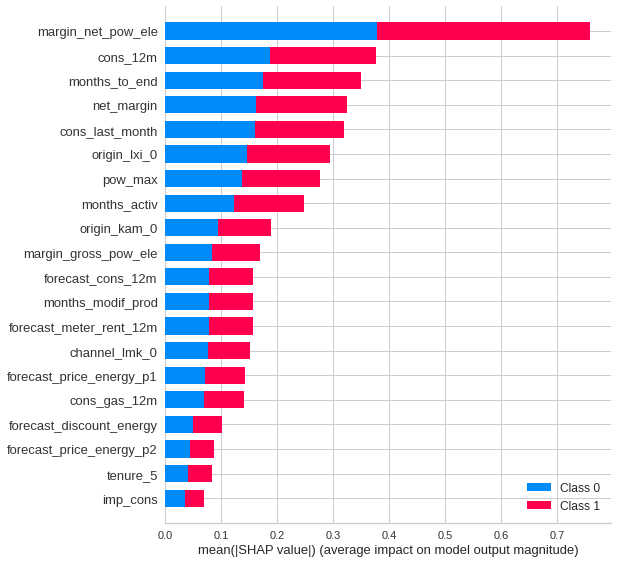

In [41]:
# Model Interpretation
interpret_model(best_model)

# Interpretation

The SHAP figure above reinforces the insight that churn is mainly driven by the customer's cnsumption and margins over a 12 month period.


In [44]:
# finalize and perform prediction
final = finalize_model(tuned_model)
predict_model(final)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9327,0.9883,0.3534,0.9832,0.5199,0.4923,0.5678


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max,months_activ,months_to_end,months_modif_prod,has_gas_1,nb_prod_act_1,nb_prod_act_10,nb_prod_act_2,nb_prod_act_3,nb_prod_act_31,nb_prod_act_32,nb_prod_act_4,nb_prod_act_5,nb_prod_act_6,nb_prod_act_8,nb_prod_act_9,tenure_0,tenure_10,tenure_11,tenure_12,tenure_13,tenure_15,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,months_renewal_0,months_renewal_1,months_renewal_10,months_renewal_11,months_renewal_12,months_renewal_14,months_renewal_15,months_renewal_16,months_renewal_2,months_renewal_3,months_renewal_4,months_renewal_5,months_renewal_6,months_renewal_7,months_renewal_8,months_renewal_9,channel_epu_1,channel_ewp_0,channel_fix_1,channel_foo_0,channel_lmk_0,channel_sdd_1,channel_usi_0,origin_ewx_0,origin_kam_0,origin_ldk_0,origin_lxi_0,origin_usa_0,churn,Label,Score
0,4.578410,4.862298,3.514149,3.571151,0.0,2.165036,0.116509,0.101397,40.606701,2.502905,3.240000,3.240000,484.959991,17.320000,49.000000,10.0,13.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0.9531
1,4.624076,4.284859,0.000000,3.634099,0.0,2.086822,0.115174,0.098837,40.606701,0.000000,18.120001,18.120001,502.269989,19.799999,56.768967,5.0,34.746799,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.9795
2,3.915927,0.000000,0.000000,3.092696,0.0,1.179552,0.145711,0.000000,44.311378,0.000000,16.920000,16.920000,123.239998,10.390000,42.000000,5.0,42.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.9486
3,4.347779,3.252125,1.919078,3.514568,0.0,1.169086,0.143166,0.000000,44.311378,1.107549,11.420000,11.420000,263.989990,13.200000,39.000000,8.0,39.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.9115
4,3.299289,0.000000,2.082785,2.226935,0.0,2.119355,0.111186,0.096074,40.606701,1.085647,3.360000,3.360000,16.010000,16.000000,74.000000,11.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,0.9573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,4.237946,0.000000,0.000000,3.427835,0.0,1.236033,0.145137,0.000000,44.311378,0.000000,20.200001,20.200001,167.779999,13.856000,42.000000,5.0,8.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0,0,0.9792
4825,4.646933,4.244376,0.000000,3.503728,0.0,1.309417,0.143166,0.000000,44.311378,0.000000,13.100000,13.100000,290.089996,10.390000,53.000000,6.0,53.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0,

# Final Model
A final accuracy of 93% and final precision of 98%

# Discount Strategy Evaluation
